
Author: [Geoff Boeing](https://geoffboeing.com/)

  
从OpenStreetMap获取世界上任何地方的街道网络和其他空间数据，然后分析和可视化它们。


More info:

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [Documentation and install instructions](https://osmnx.readthedocs.io)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Journal article and citation info](http://geoffboeing.com/publications/osmnx-complex-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  
  
OSMnx的一些关键功能的快速浏览，包括如何:

    - 下载/建模街道网络

    — 计算统计数据

    — 可视化中心性

    - 计算速度/旅行时间和计算最短路径

    - 附加和可视化高程数据和边缘等级

    - 下载/建模其他基础设施类型

    - 下载兴趣点数据

 

In [1]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
ox.__version__

C:\Users\think\anaconda3\envs\ox\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))
C:\Users\think\anaconda3\envs\ox\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


'1.1.2'

# 使用街道网络

In [2]:
ox.settings.use_cache = True
# ox.use_cache = True

## graph_from_place

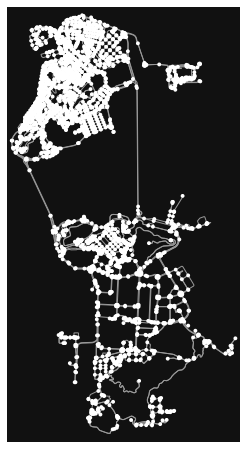

In [4]:
# 下载一个城市的街道网络模型，然后可视化它

G = ox.graph_from_place("Macao", network_type="drive")
fig, ax = ox.plot_graph(G)

OSMnx对“Zhangjiagang, Jiangsu, China”进行地理编码，从nomatim API中检索该城市的位置边界，从Overpass API中检索这些边界内的可行驶街道网络数据，构建一个图模型，然后简化/修正其拓扑结构，使节点表示交叉点，边表示连接它们的街道段。


OSMnx将所有网络建模为NetworkX `MultiDiGraph`对象。也可以转换为:

- 无向网络

- 没有平行边的有向图

- GeoPandas的GeoDataFrames

 

OSMnx可以让你下载街道网络数据并建立经过拓扑学修正的街道网络，对网络进行投影和绘图，并将街道网络保存为SVG、GraphML文件、GeoPackage或shapefiles以供日后使用。街道网络是有方向性的，并保持单向性。关于创建街道网络的更深入的演示，请看这个笔记本。[this notebook](03-graph-place-queries.ipynb).

你可以通过向OSMnx提供以下任何一项来下载街道网络（在下面的例子中演示）。

- 一个边界框
- 一个经纬度点+距离
- 一个地址加一个距离
- 一个地名或地名列表（自动进行地理编码并获得其边界）。
- 一个所需街道网络边界的多边形
- 一个.OSM格式的xml文件

你还可以指定几种不同的网络类型。

- 'drive'--获得可驾驶的公共街道（但不是服务道路）
- 'drive_service'--获得可驾驶的街道，包括服务道路
- 'walk'--获得所有行人可以使用的街道和路径（这种网络类型忽略了单向性）。
- 'bike'--获得骑自行车的人可以使用的所有街道和路径
- 'all'--下载所有非私有的OSM街道和路径（这是默认的网络类型，除非你指定一个不同的网络类型）。
- 'all_private'--下载所有OSM街道和路径，包括私人使用的街道和路径

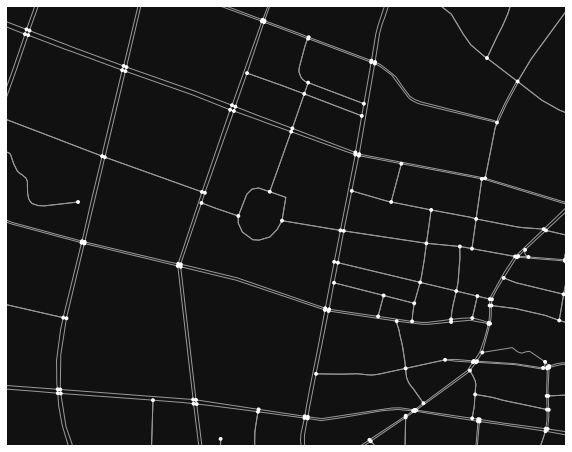

In [4]:
fig, ax = ox.plot_graph(G,bbox=(31.88, 31.86, 120.54, 120.51),figsize=(10,10))

In [5]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

In [6]:
# MultiDiGraph --> 无向MultiGraph
M = ox.utils_graph.get_undirected(G)

# 将MultiDiGraph转换为没有平行边的DiGraph
D = ox.utils_graph.get_digraph(G)

In [5]:
#  将图形转换成节点和边的GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
24329650,22.186006,113.536963,4,NaN,POINT (113.53696 22.18601)
24329810,22.193945,113.535453,4,NaN,POINT (113.53545 22.19395)
24329811,22.193559,113.536256,3,NaN,POINT (113.53626 22.19356)
24329812,22.193069,113.537178,3,NaN,POINT (113.53718 22.19307)
24329813,22.193024,113.537358,3,NaN,POINT (113.53736 22.19302)


In [6]:
gdf_edges.head()

osmid lanes  \
u        v          key                                 
24329650 4828764798 0                 206830699     2   
         2168772470 0    [192187342, 751270127]     2   
         518265217  0                 206853644     1   
24329810 1793358494 0                 518690125   NaN   
         1793358410 0    [819061608, 291345235]     2   

                                                      name        highway  \
u        v          key                                                     
24329650 4828764798 0           民國大馬路 Avenida da República       tertiary   
         2168772470 0                                  NaN  tertiary_link   
         518265217  0           民國大馬路 Avenida da República       tertiary   
24329810 1793358494 0    柯邦迪前地(司打口) Praça de Ponte e Horta    residential   
         1793358410 0         柯邦迪前地 Praça de Ponte e Horta        primary   

                         oneway   length  \
u        v          key                    
24329650 4828764798 0     False  125.155   
         2168772470 0      True   64.398   
         518265217  0      True   54.242   
24329810 1793358494 0      True   39.578   
         1793358410 0      True   31.143   

                                                                  geometry  \
u        v          key                                                      
24329650 4828764798 0    LINESTRING (113.53696 22.18601, 113.53577 22.1...   
         2168772470 0    LINESTRING (113.53696 22.18601, 113.53714 22.1...   
         518265217  0    LINESTRING (113.53696 22.18601, 113.53718 22.1...   
24329810 1793358494 0    LINESTRING (113.53545 22.19395, 113.53580 22.1...   
         1793358410 0    LINESTRING (113.53545 22.19395, 113.53541 22.1...   

                        bridge maxspeed junction access tunnel width  
u        v          key                                               
24329650 4828764798 0      NaN      NaN      NaN    NaN    NaN   NaN  
         2168772470 0      NaN      NaN      NaN    NaN    NaN   NaN  
         518265217  0      NaN      NaN      NaN    NaN    NaN   NaN  
24329810 1793358494 0      NaN      NaN      NaN    NaN    NaN   NaN  
         1793358410 0      NaN      NaN      NaN    NaN    NaN   NaN

# 道路转点

In [8]:
gdf_edges = gdf_edges.reset_index()

In [10]:
gdf_edges.columns

Index(['u', 'v', 'key', 'osmid', 'lanes', 'name', 'highway', 'oneway',
       'length', 'geometry', 'bridge', 'maxspeed', 'junction', 'access',
       'tunnel', 'width'],
      dtype='object')

In [11]:
gdf_edges = gdf_edges[['name','geometry']]

In [13]:
gdf_edges.head(1)

,name,geometry
0,民國大馬路 Avenida da República,"LINESTRING (113.53696 22.18601, 113.53577 22.1..."


# 继续

In [9]:
gdf_edges.iloc[1,]['geometry'].coords[:]

[(120.767436, 31.9574307),
 (120.766838, 31.957397),
 (120.766136, 31.957361),
 (120.765656, 31.957329),
 (120.765427, 31.957216),
 (120.764809, 31.956644),
 (120.764305, 31.956167),
 (120.764206, 31.956089),
 (120.763977, 31.956114),
 (120.763649, 31.956388),
 (120.763397, 31.956583),
 (120.7632427, 31.9567)]

In [10]:
gdf_edges.iloc[2,]['geometry'].coords[:]

[(120.767436, 31.9574307),
 (120.767654, 31.957443),
 (120.768326, 31.957483),
 (120.769028, 31.957529),
 (120.769089, 31.957527),
 (120.769333, 31.957411),
 (120.770149, 31.956326),
 (120.77024, 31.9561687),
 (120.77037, 31.955944),
 (120.770721, 31.953575),
 (120.771996, 31.942982),
 (120.776459, 31.9251)]

In [11]:
list(G.edges(data=True))[6]

(369647856,
 369647868,
 {'osmid': [249789953,
   777256442,
   926737908,
   926737909,
   777256441,
   926737914,
   926737915,
   249789948,
   250102814],
  'oneway': True,
  'lanes': '2',
  'ref': 'G4221',
  'name': '沪武高速(沿江)',
  'highway': 'motorway',
  'maxspeed': '120',
  'length': 3468.221000000001,
  'bridge': 'yes',
  'geometry': <shapely.geometry.linestring.LineString at 0x28e02649c30>})

In [12]:
gdf_nodes[gdf_nodes.index==621409035]

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
621409035,31.984887,120.737825,3,NaN,NaN,POINT (120.73783 31.98489)


可以从节点/边的GeoDataFrames创建一个图形，只要gdf_nodes是由osmid索引的，gdf_edges是由u、v、key多索引的（遵循正常的MultiDiGraph结构）。这允许你加载图形节点/边缘形状文件或GeoPackage层作为GeoDataFrames，然后转换为MultiDiGraph用于图形分析。

In [13]:
# convert node/edge GeoPandas GeoDataFrames to a NetworkX MultiDiGraph
G2 = ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=G.graph)

## 其他下载街道网络的函数

https://osmnx.readthedocs.io/en/stable/internals.html#osmnx-graph-module

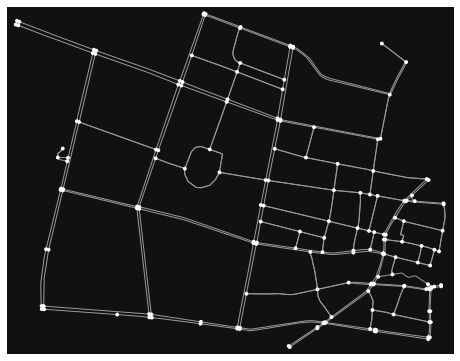

In [14]:
north, south, east, west = 31.88, 31.86, 120.54, 120.51
G1 = ox.graph_from_bbox(north, south, east, west, network_type="all")
fig, ax = ox.plot_graph(G1)

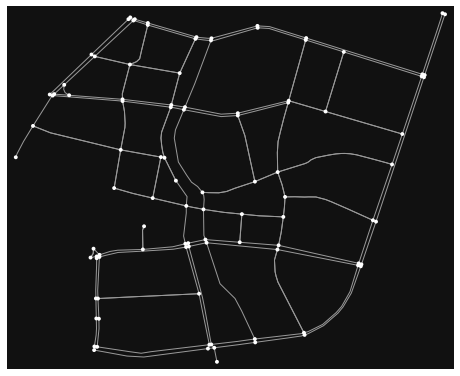

In [15]:
location_point = (31.866, 120.544)
G2 = ox.graph_from_point(location_point, dist=750, dist_type="bbox", network_type="drive")
fig, ax = ox.plot_graph(G2)

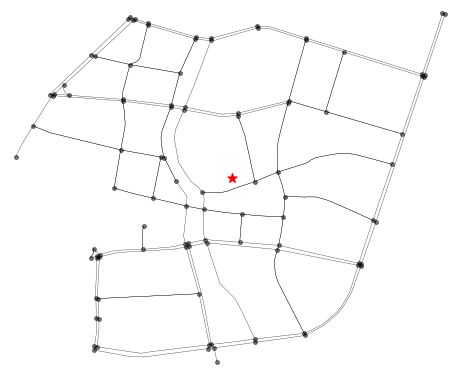

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [16]:
location_point = (31.866, 120.544)
G3 = ox.graph_from_point(location_point, dist=750, dist_type="bbox", network_type="drive")


fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(120.544,31.866,marker='*',s=100,color='red')

ox.plot_graph(G3,ax=ax,
            node_color="k",
            node_size=15,
            node_alpha=0.5,
            node_edgecolor="k",
            edge_linewidth=0.3,
            edge_color="k",
             )

In [17]:
GX = ox.graph_from_address(
    address="350 5th Ave, New York, NY",
    dist=1000,
    dist_type="network",
    network_type="drive",
)

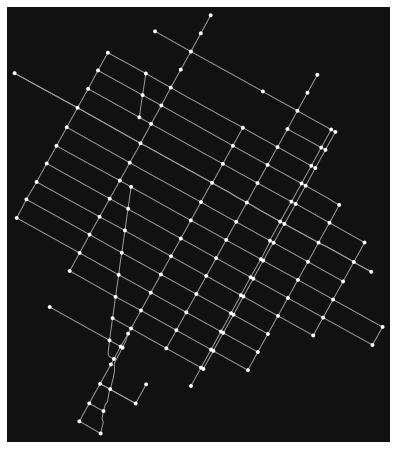

In [18]:
fig, ax = ox.plot_graph(GX)

In [19]:
G_projected = ox.project_graph(GX)

In [20]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G_projected)
gdf_nodes.head()

,y,x,highway,street_count,lon,lat,geometry
osmid,,,,,,,
42427786,4.510977e+06,585535.631867,traffic_signals,4,-73.986846,40.745301,POINT (585535.632 4510977.319)
42427787,4.511058e+06,585385.565626,traffic_signals,4,-73.988612,40.746046,POINT (585385.566 4511058.244)
42438544,4.510908e+06,585498.040694,traffic_signals,4,-73.987301,40.744678,POINT (585498.041 4510907.752)
42427797,4.511126e+06,585261.900493,traffic_signals,4,-73.990068,40.746666,POINT (585261.900 4511125.687)
42428223,4.510974e+06,585374.638098,traffic_signals,4,-73.988753,40.745289,POINT (585374.638 4510974.085)


In [21]:
gdf_edges.head()

osmid  oneway              name  \
u        v        key                                                      
42427786 42427787 0                    5669669    True  West 29th Street   
         42438544 0                  464515614    True        5th Avenue   
42427787 42427797 0                    5669669    True  West 29th Street   
         42428223 0    [976050704, 1027208772]    True          Broadway   
42438544 42445888 0                    5671401    True  East 28th Street   

                           highway maxspeed   length  \
u        v        key                                  
42427786 42427787 0    residential   25 mph  170.269   
         42438544 0      secondary   25 mph   79.130   
42427787 42427797 0    residential   25 mph  140.676   
         42428223 0       tertiary   25 mph   85.014   
42438544 42445888 0    residential   25 mph  154.372   

                                                                geometry  \
u        v        key                                                      
42427786 42427787 0    LINESTRING (585535.632 4510977.319, 585468.815...   
         42438544 0    LINESTRING (585535.632 4510977.319, 585533.383...   
42427787 42427797 0    LINESTRING (585385.566 4511058.244, 585379.074...   
         42428223 0    LINESTRING (585385.566 4511058.244, 585384.264...   
42438544 42445888 0    LINESTRING (585498.041 4510907.752, 585634.174...   

                        lanes access  
u        v        key                 
42427786 42427787 0       NaN    NaN  
         42438544 0       NaN    NaN  
42427787 42427797 0       NaN    NaN  
         42428223 0    [1, 2]    NaN  
42438544 42445888 0       NaN    NaN

In [22]:
# G5 = ox.graph_from_polygon(polygon, network_type="drive_service")

# 道路网络统计信息

In [23]:
# 网络覆盖了多大的面积（平方米）？
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

914482936.2023499

In [24]:
# 显示一些关于网络的基本统计资料
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

{'n': 6271,
 'm': 15268,
 'k_avg': 4.869398819964918,
 'edge_length_total': 5064415.937000041,
 'edge_length_avg': 331.7013320015746,
 'streets_per_node_avg': 3.0859512039547123,
 'streets_per_node_counts': {0: 0,
  1: 857,
  2: 20,
  3: 3163,
  4: 2191,
  5: 38,
  6: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.13666081964598947,
  2: 0.0031892840057407114,
  3: 0.5043852655078935,
  4: 0.3493860628288949,
  5: 0.006059639610907351,
  6: 0.0003189284005740711},
 'intersection_count': 5414,
 'street_length_total': 3247999.858000008,
 'street_segment_count': 9650,
 'street_length_avg': 336.58029616580393,
 'circuity_avg': 1.0410048079372751,
 'self_loop_proportion': 0.0004145077720207254,
 'clean_intersection_count': 3802,
 'node_density_km': 6.857427024327111,
 'intersection_density_km': 5.920285426520009,
 'edge_density_km': 5538.010318739753,
 'street_density_km': 3551.7336949864252,
 'clean_intersection_density_km': 4.157540670784831}

In [25]:
stats = ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)
pd.Series(stats)

n                                                                             6271
m                                                                            15268
k_avg                                                                     4.869399
edge_length_total                                                      5064415.937
edge_length_avg                                                         331.701332
streets_per_node_avg                                                      3.085951
streets_per_node_counts          {0: 0, 1: 857, 2: 20, 3: 3163, 4: 2191, 5: 38,...
streets_per_node_proportions     {0: 0.0, 1: 0.13666081964598947, 2: 0.00318928...
intersection_count                                                            5414
street_length_total                                                    3247999.858
street_segment_count                                                          9650
street_length_avg                                                       336.580296
circ

stats documentation: https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.stats

# 保存与导入网络

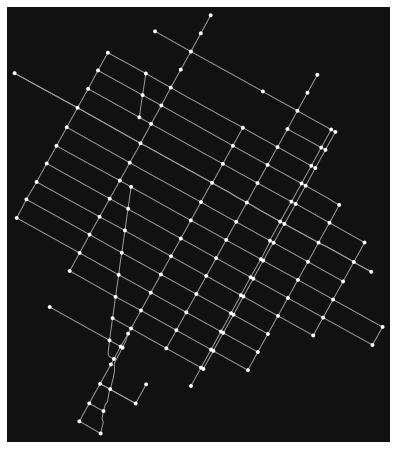

In [26]:
fig, ax = ox.plot_graph(GX)

In [27]:
# save graph to disk as geopackage (for GIS) or graphml file (for gephi etc)
ox.save_graph_geopackage(GX, filepath="./data/mynetwork.gpkg")
ox.save_graphml(GX, filepath="./data/mynetwork.graphml")

In [28]:
import geopandas as gpd

gpd.read_file("./data/mynetwork.gpkg") # 无法保存拓扑细节

,osmid,y,x,highway,street_count,geometry
0,42427786,40.745301,-73.986846,traffic_signals,4,POINT (-73.98685 40.74530)
1,42427787,40.746046,-73.988612,traffic_signals,4,POINT (-73.98861 40.74605)
2,42427797,40.746666,-73.990068,traffic_signals,4,POINT (-73.99007 40.74667)
3,42427805,40.747872,-73.992925,traffic_signals,4,POINT (-73.99293 40.74787)
4,42428192,40.739857,-73.989566,traffic_signals,4,POINT (-73.98957 40.73986)
...,...,...,...,...,...,...
124,4597668044,40.745206,-73.982789,traffic_signals,4,POINT (-73.98279 40.74521)
125,6223969260,40.748302,-73.988188,traffic_signals,3,POINT (-73.98819 40.74830)
126,7372860100,40.743275,-73.988325,,3,POINT (-73.98832 40.74328)
127,7372860102,40.742794,-73.988579,,3,POINT (-73.98858 40.74279)


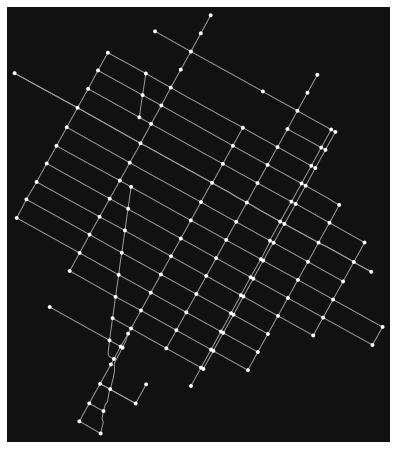

In [29]:
GX2 = ox.load_graphml("./data/mynetwork.graphml")
fig, ax = ox.plot_graph(GX2)

# 可视化街道中心性

在这里，我们绘制了街道网络，并根据其相对紧密性中心度对其边缘（街道）进行着色。

## betweenness centrality

In [30]:
type(GX)

networkx.classes.multidigraph.MultiDiGraph

In [31]:
type(ox.get_digraph(GX))

networkx.classes.digraph.DiGraph

In [32]:
bc = nx.betweenness_centrality(ox.get_digraph(GX), weight="length")
max_node, max_bc = max(bc.items(), key=lambda x: x[1])
max_node, max_bc

(42437644, 0.17734990157480315)

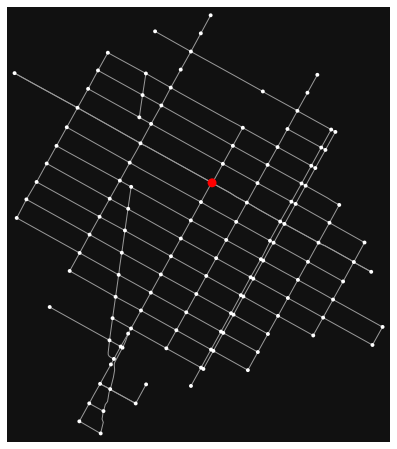

In [33]:
nc = ["r" if node == max_node else "w" for node in GX.nodes]
ns = [80 if node == max_node else 15 for node in GX.nodes]
fig, ax = ox.plot_graph(GX, node_size=ns, node_color=nc, node_zorder=2)

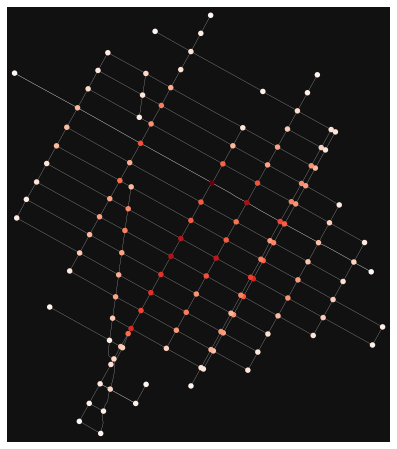

In [34]:
# add the betweenness centraliy values as new node attributes, then plot
nx.set_node_attributes(GX, bc, "bc")
nc = ox.plot.get_node_colors_by_attr(GX, "bc", cmap="Reds")
fig, ax = ox.plot_graph(
    GX,
    node_color=nc,
    node_size=30,
    node_zorder=2,
    edge_linewidth=0.2,
    edge_color="w",
)

# 路径

In [35]:
place = "Huangpu, Shanghai, China"
GHP = ox.graph_from_place(place, network_type="drive")
Gp = ox.project_graph(GHP)

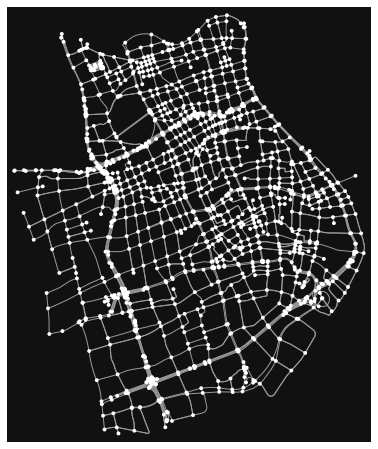

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [36]:
ox.plot_graph(Gp)

nearest_nodes和nearest_edges函数接收x和y（或lng/lat）坐标的数组，并返回离每个节点/边最近的节点。

## 用OSMnx快速搜索最近的节点/边缘

In [37]:
points = ox.utils_geo.sample_points(ox.get_undirected(Gp), n=100)
X = points.x.values
Y = points.y.values
X0 = X.mean()
Y0 = Y.mean()

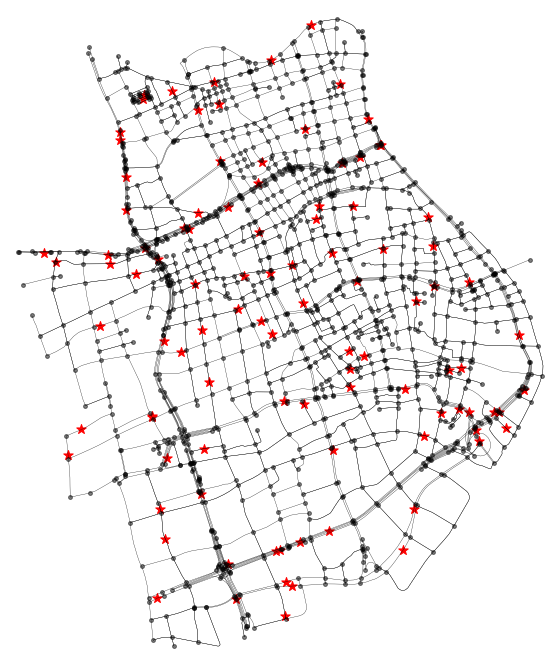

(<Figure size 864x864 with 1 Axes>, <AxesSubplot:>)

In [38]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(X,Y,marker='*',s=100,color='red')

ox.plot_graph(Gp,ax=ax,
            node_color="k",
            node_size=15,
            node_alpha=0.5,
            node_edgecolor="k",
            edge_linewidth=0.3,
            edge_color="k",bgcolor='none'
             )

https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=nearest_nodes#osmnx.distance.nearest_nodes

In [39]:
nodes, dists = ox.nearest_nodes(Gp, X, Y, return_dist=True)

In [40]:
pd.DataFrame({'nodes':nodes,'dists':dists})

,nodes,dists
0,601712550,57.473272
1,64846822,12.367108
2,483103066,24.748670
3,1882296810,42.170551
4,640627221,41.045590
...,...,...
95,62917034,29.717085
96,858404226,151.559536
97,483119728,54.914070
98,78604047,75.154427


In [41]:
edges, dists = ox.nearest_edges(Gp, X, Y, return_dist=True)

In [42]:
pd.DataFrame({'edges':edges,'dists':dists})

,edges,dists
0,"(601712550, 856909184, 0)",2.200379e-11
1,"(477601189, 64841428, 0)",1.611684e-11
2,"(483103066, 483103362, 0)",7.730874e-11
3,"(1882296810, 622623197, 0)",8.743432e-12
4,"(850278592, 477633780, 0)",6.939996e-11
...,...,...
95,"(5031510660, 4987519209, 0)",7.878888e-11
96,"(858404226, 109425172, 0)",1.899200e-10
97,"(483119728, 483119801, 0)",2.617290e-11
98,"(71127847, 1890531879, 0)",1.937195e-11


In [43]:
edge = ox.nearest_edges(Gp, X0, Y0)
edge

(64813782, 483108462, 0)

## 最短路径

In [44]:
GHP # 经纬度

In [45]:
orig = list(GHP)[0]
dest = list(GHP)[120]

In [46]:
GHP.nodes()[orig]['x'],GHP.nodes()[orig]['y']

(121.4927874, 31.2087342)

In [47]:
orig = list(GHP)[0]
dest = list(GHP)[120]

dic = {orig:[GHP.nodes()[orig]['x'],GHP.nodes()[orig]['y']],
       dest:[GHP.nodes()[dest]['x'],GHP.nodes()[dest]['y']]
      }

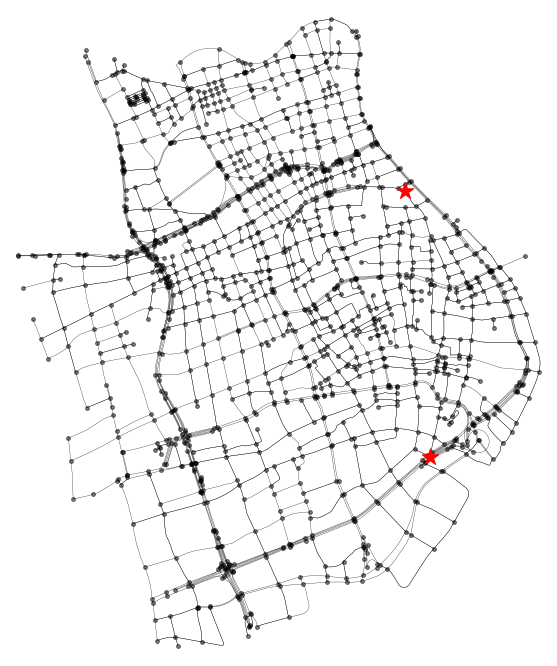

(<Figure size 864x864 with 1 Axes>, <AxesSubplot:>)

In [48]:
fig, ax = plt.subplots(figsize=(12,12))
# ax.scatter(X,Y,marker='o',s=50,color='red')
nx.draw_networkx_nodes(GHP,pos=dic, nodelist=[orig,dest],ax=ax,node_color='red',node_shape='*')

ox.plot_graph(GHP,ax=ax,
            node_color="k",
            node_size=15,
            node_alpha=0.5,
            node_edgecolor="k",
            edge_linewidth=0.3,
            edge_color="k",bgcolor='none'
             )


In [49]:
route = ox.shortest_path(GHP, orig, dest, weight="length")

In [50]:
route

[62829161,
 482734405,
 5558596909,
 476562079,
 476561865,
 476561935,
 476561937,
 481501843,
 1324294936,
 1324294654,
 1324295202,
 1324294807,
 1324294714,
 1324294917,
 1324294804,
 1324295022,
 476559405,
 476559359,
 654400890,
 4198258583,
 1320103751,
 476560879,
 602393484,
 475980598,
 482729435,
 475978447,
 385114529,
 385113795,
 152848312,
 475974959,
 210643104]

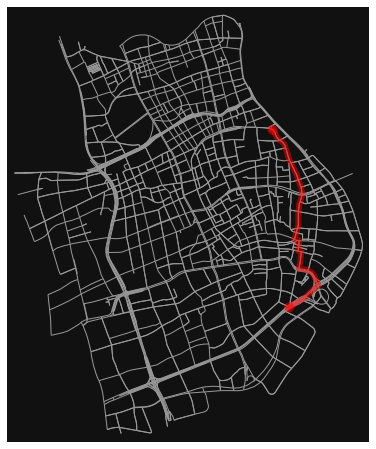

In [51]:
fig, ax = ox.plot_graph_route(GHP, route, route_color="red", route_linewidth=6, node_size=0)

计算大量的最短路径可能会很慢，但OSMnx有内置的最短路径求解器并行化和多处理功能。通过shortest_path函数，你可以传入单一的原点-目的地对来求解一条最短路径，或者你可以传入原点和目的地的列表来求解这些对之间的每一条最短路径。如果你要求解多个出发地/目的地的最短路径，cpus参数决定了要利用多少个CPU核心进行并行求解。多处理器会增加一些开销，所以只有在你求解大量路径的时候才会更快。它还需要大量的内存（因为它必须将图形复制到每个子进程中），所以在设置cpus参数时要小心使用你的内存。

In [52]:
# calculate 100,000 shortest-path routes using random origin-destination pairs
n = 10
origs = np.random.choice(GHP.nodes, size=n, replace=True)
dests = np.random.choice(GHP.nodes, size=n, replace=True)

In [53]:
# %%time
routes = ox.shortest_path(GHP, origs, dests, weight="length", cpus=6)

In [54]:
len(routes)

10

In [55]:
routes[2]

[1888323015,
 677799508,
 1888322988,
 1722215053,
 1722215093,
 1888422935,
 476671870,
 103788196,
 210686289,
 9381975866,
 9381975868,
 267194971,
 477620688,
 9381975886,
 9381975888,
 477615647,
 477615613,
 267198436,
 267198397,
 267198208,
 850278592,
 601145298,
 1928818253,
 267195027,
 638736478,
 638736480,
 638736559,
 638736472,
 638736481,
 9630984952,
 9630984946,
 9630984947]

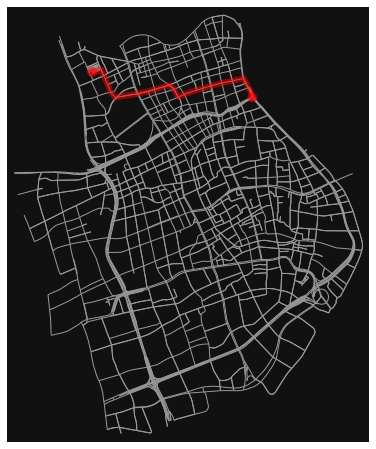

In [56]:
fig, ax = ox.plot_graph_route(GHP, routes[2], route_color="red", route_linewidth=6, node_size=0)

In [57]:
# C:\Users\think\anaconda3\envs\ox\Lib\site-packages\osmnx

In [58]:
get_route = routes[2]

In [59]:
x = []
y = []
for u, v in zip(get_route[:-1], get_route[1:]):
    # if there are parallel edges, select the shortest in length
    data = min(GHP.get_edge_data(u, v).values(), key=lambda d: d["length"])
    if "geometry" in data:
        # if geometry attribute exists, add all its coords to list
        xs, ys = data["geometry"].xy
        x.extend(xs)
        y.extend(ys)
    else:
        # otherwise, the edge is a straight line from node to node
        x.extend((GHP.nodes[u]["x"], GHP.nodes[v]["x"]))
        y.extend((GHP.nodes[u]["y"], GHP.nodes[v]["y"]))

In [60]:
[list(i) for i in list(zip(x,y))]

[[121.4873467, 31.2352187],
 [121.4873823, 31.235163],
 [121.4874383, 31.2350569],
 [121.4874383, 31.2350569],
 [121.4875389, 31.2350957],
 [121.4875389, 31.2350957],
 [121.4874436, 31.2352518],
 [121.4874436, 31.2352518],
 [121.4873358, 31.2354605],
 [121.4871976, 31.2357506],
 [121.4870808, 31.2359782],
 [121.4868571, 31.2363437],
 [121.4867854, 31.2364609],
 [121.4867854, 31.2364609],
 [121.4867351, 31.2365347],
 [121.4866952, 31.2365932],
 [121.4865912, 31.2367548],
 [121.4862706, 31.2372528],
 [121.4862036, 31.2373685],
 [121.4861157, 31.2375318],
 [121.4860794, 31.237624],
 [121.4860794, 31.237624],
 [121.4859882, 31.2376051],
 [121.4859882, 31.2376051],
 [121.4858525, 31.2375783],
 [121.4857279, 31.2375472],
 [121.4854947, 31.2374923],
 [121.4849478, 31.2374097],
 [121.4844135, 31.2372795],
 [121.4844135, 31.2372795],
 [121.4836664, 31.2371729],
 [121.4834233, 31.2371283],
 [121.4828569, 31.2370205],
 [121.4828569, 31.2370205],
 [121.4814006, 31.2367177],
 [121.4813189, 31.23670

In [61]:
def get_coords(get_route):
    if type(get_route) == list:
        x = []
        y = []
        for u, v in zip(get_route[:-1], get_route[1:]):
            # if there are parallel edges, select the shortest in length
            data = min(GHP.get_edge_data(u, v).values(), key=lambda d: d["length"])
            if "geometry" in data:
                # if geometry attribute exists, add all its coords to list
                xs, ys = data["geometry"].xy
                x.extend(xs)
                y.extend(ys)
            else:
                # otherwise, the edge is a straight line from node to node
                x.extend((GHP.nodes[u]["x"], GHP.nodes[v]["x"]))
                y.extend((GHP.nodes[u]["y"], GHP.nodes[v]["y"]))
        result = [list(i) for i in list(zip(x,y))]
    else:
        result = np.nan
    
    return result

In [62]:
all_routes = [get_coords(get_route) for get_route in routes]

In [63]:
result = pd.DataFrame({'origs':origs,'dests':dests,'lines_coords':all_routes})

In [64]:
result

,origs,dests,lines_coords
0,1320103867,483116582,"[[121.4914994, 31.2202285], [121.4914918, 31.2..."
1,638736468,75351492,"[[121.4691251, 31.2389311], [121.4692157, 31.2..."
2,1888323015,9630984947,"[[121.4873467, 31.2352187], [121.4873823, 31.2..."
3,475984763,479322299,"[[121.4996159, 31.2246909], [121.4995387, 31.2..."
4,856909246,479294044,"[[121.4849926, 31.2102664], [121.4831378, 31.2..."
5,477640277,481501843,"[[121.4764675, 31.2398076], [121.4755553, 31.2..."
6,482729435,857780861,"[[121.4945277, 31.2238864], [121.4945426, 31.2..."
7,476078083,8366096941,"[[121.4865464, 31.2319332], [121.4865293, 31.2..."
8,1890531937,477633780,"[[121.4675517, 31.2273745], [121.4677561, 31.2..."
9,9630984947,623406201,"[[121.4636995, 31.2384211], [121.4637793, 31.2..."


In [65]:
from shapely.geometry import LineString

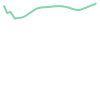

In [66]:
LineString(result['lines_coords'][3])

In [67]:
lst = [LineString(result['lines_coords'][i]) if type(result['lines_coords'][i]) == list else np.nan for i in range(len(result)) ]

In [68]:
resultx = gpd.GeoDataFrame({'origs':result['origs'].values,
                  'dests':result['dests'].values,
                  'geometry':lst},crs='epsg:4326')

In [69]:
resultx.head(1)

,origs,dests,geometry
0,1320103867,483116582,"LINESTRING (121.49150 31.22023, 121.49149 31.2..."


<AxesSubplot:>

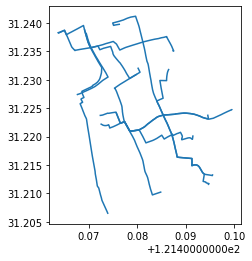

In [70]:
resultx.plot()